In this notebook, we will explore an alcohol dataset and apply clustering techniques and unsupervised to analyze and visualize the data. We will use a variety of tools for preprocessing, fitting models, and visualizing our findings.

In [20]:
# Import modules
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import io

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')

In [2]:
# Access Data
response = requests.get("https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv")
df = pd.read_csv(io.StringIO(response.text)).drop(columns=['class_name', 'class_label']) ## Drop class columns
display(df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Missing Values?
df.isna().sum()

alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64

In [4]:
# -- The data has different types of features, such as proline and flavonoids, that have drastically different values and scales, 
# -- so utilizing StandardScaler is required --
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


C:\Users\ggpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ggpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ggpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ggpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

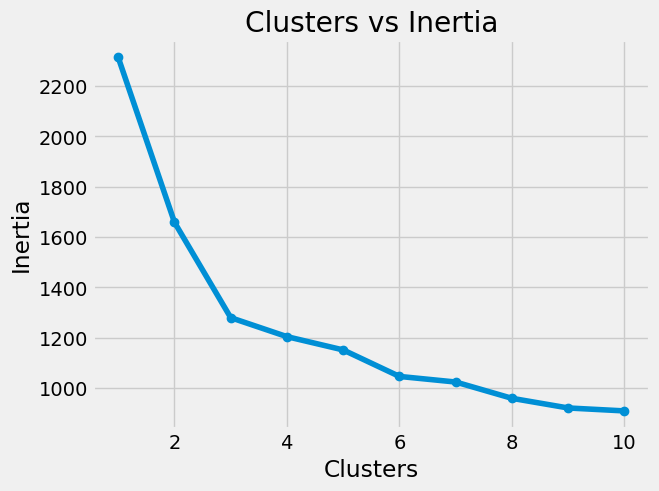

In [5]:
# How many clusters to use for KMeans clustering
# -- We will do this by finding the inertia values for different cluster values

# Determine the amount of clusters
inertia_vals = []
for i in range(1, 11): #1-10
    temp_mod = KMeans(n_clusters = i)
    temp_mod.fit(scaled_data)
    inertia_vals.append(temp_mod.inertia_)

plt.plot(np.arange(1,11), inertia_vals, marker='o')
plt.xlabel("Clusters") ; plt.ylabel("Inertia")
plt.title("Clusters vs Inertia")
plt.show()

From this above graph, it is clear that we should use 3 clusters as it has a lower intertia value, and has less clusters/ Ideally we want to use the elbow value for the amount of clusters.

In [6]:
# Create Model
kmeans = KMeans(n_clusters = 3, random_state=42)

In [7]:
labels = kmeans.fit_predict(scaled_data)
labels

C:\Users\ggpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [8]:
df['Label'] = labels
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [9]:
# -- Create tSNE model to visualize clusters
model = TSNE(n_components=2, random_state=42, max_iter=500)

# -- Fit and transform data for plotting 
tsne_features = model.fit_transform(scaled_data)
print(f"First 5 TSNE features:\n{tsne_features[:5]}")

First 5 TSNE features:
[[  8.962597  -10.855641 ]
 [  8.558437   -3.969377 ]
 [  8.270182   -7.639074 ]
 [ 11.607978   -8.996637 ]
 [  4.2404704  -7.9987507]]


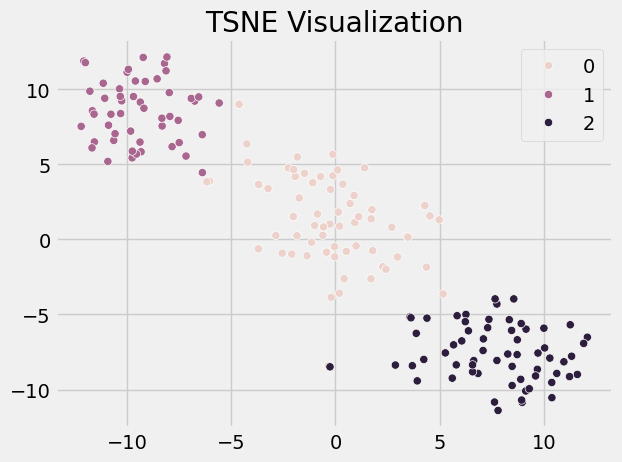

In [10]:
# -- Plot Features 
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=labels) 
plt.title("TSNE Visualization") 

plt.show()

In [11]:
grouped_df = df.groupby('Label').mean()
grouped_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
Label,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


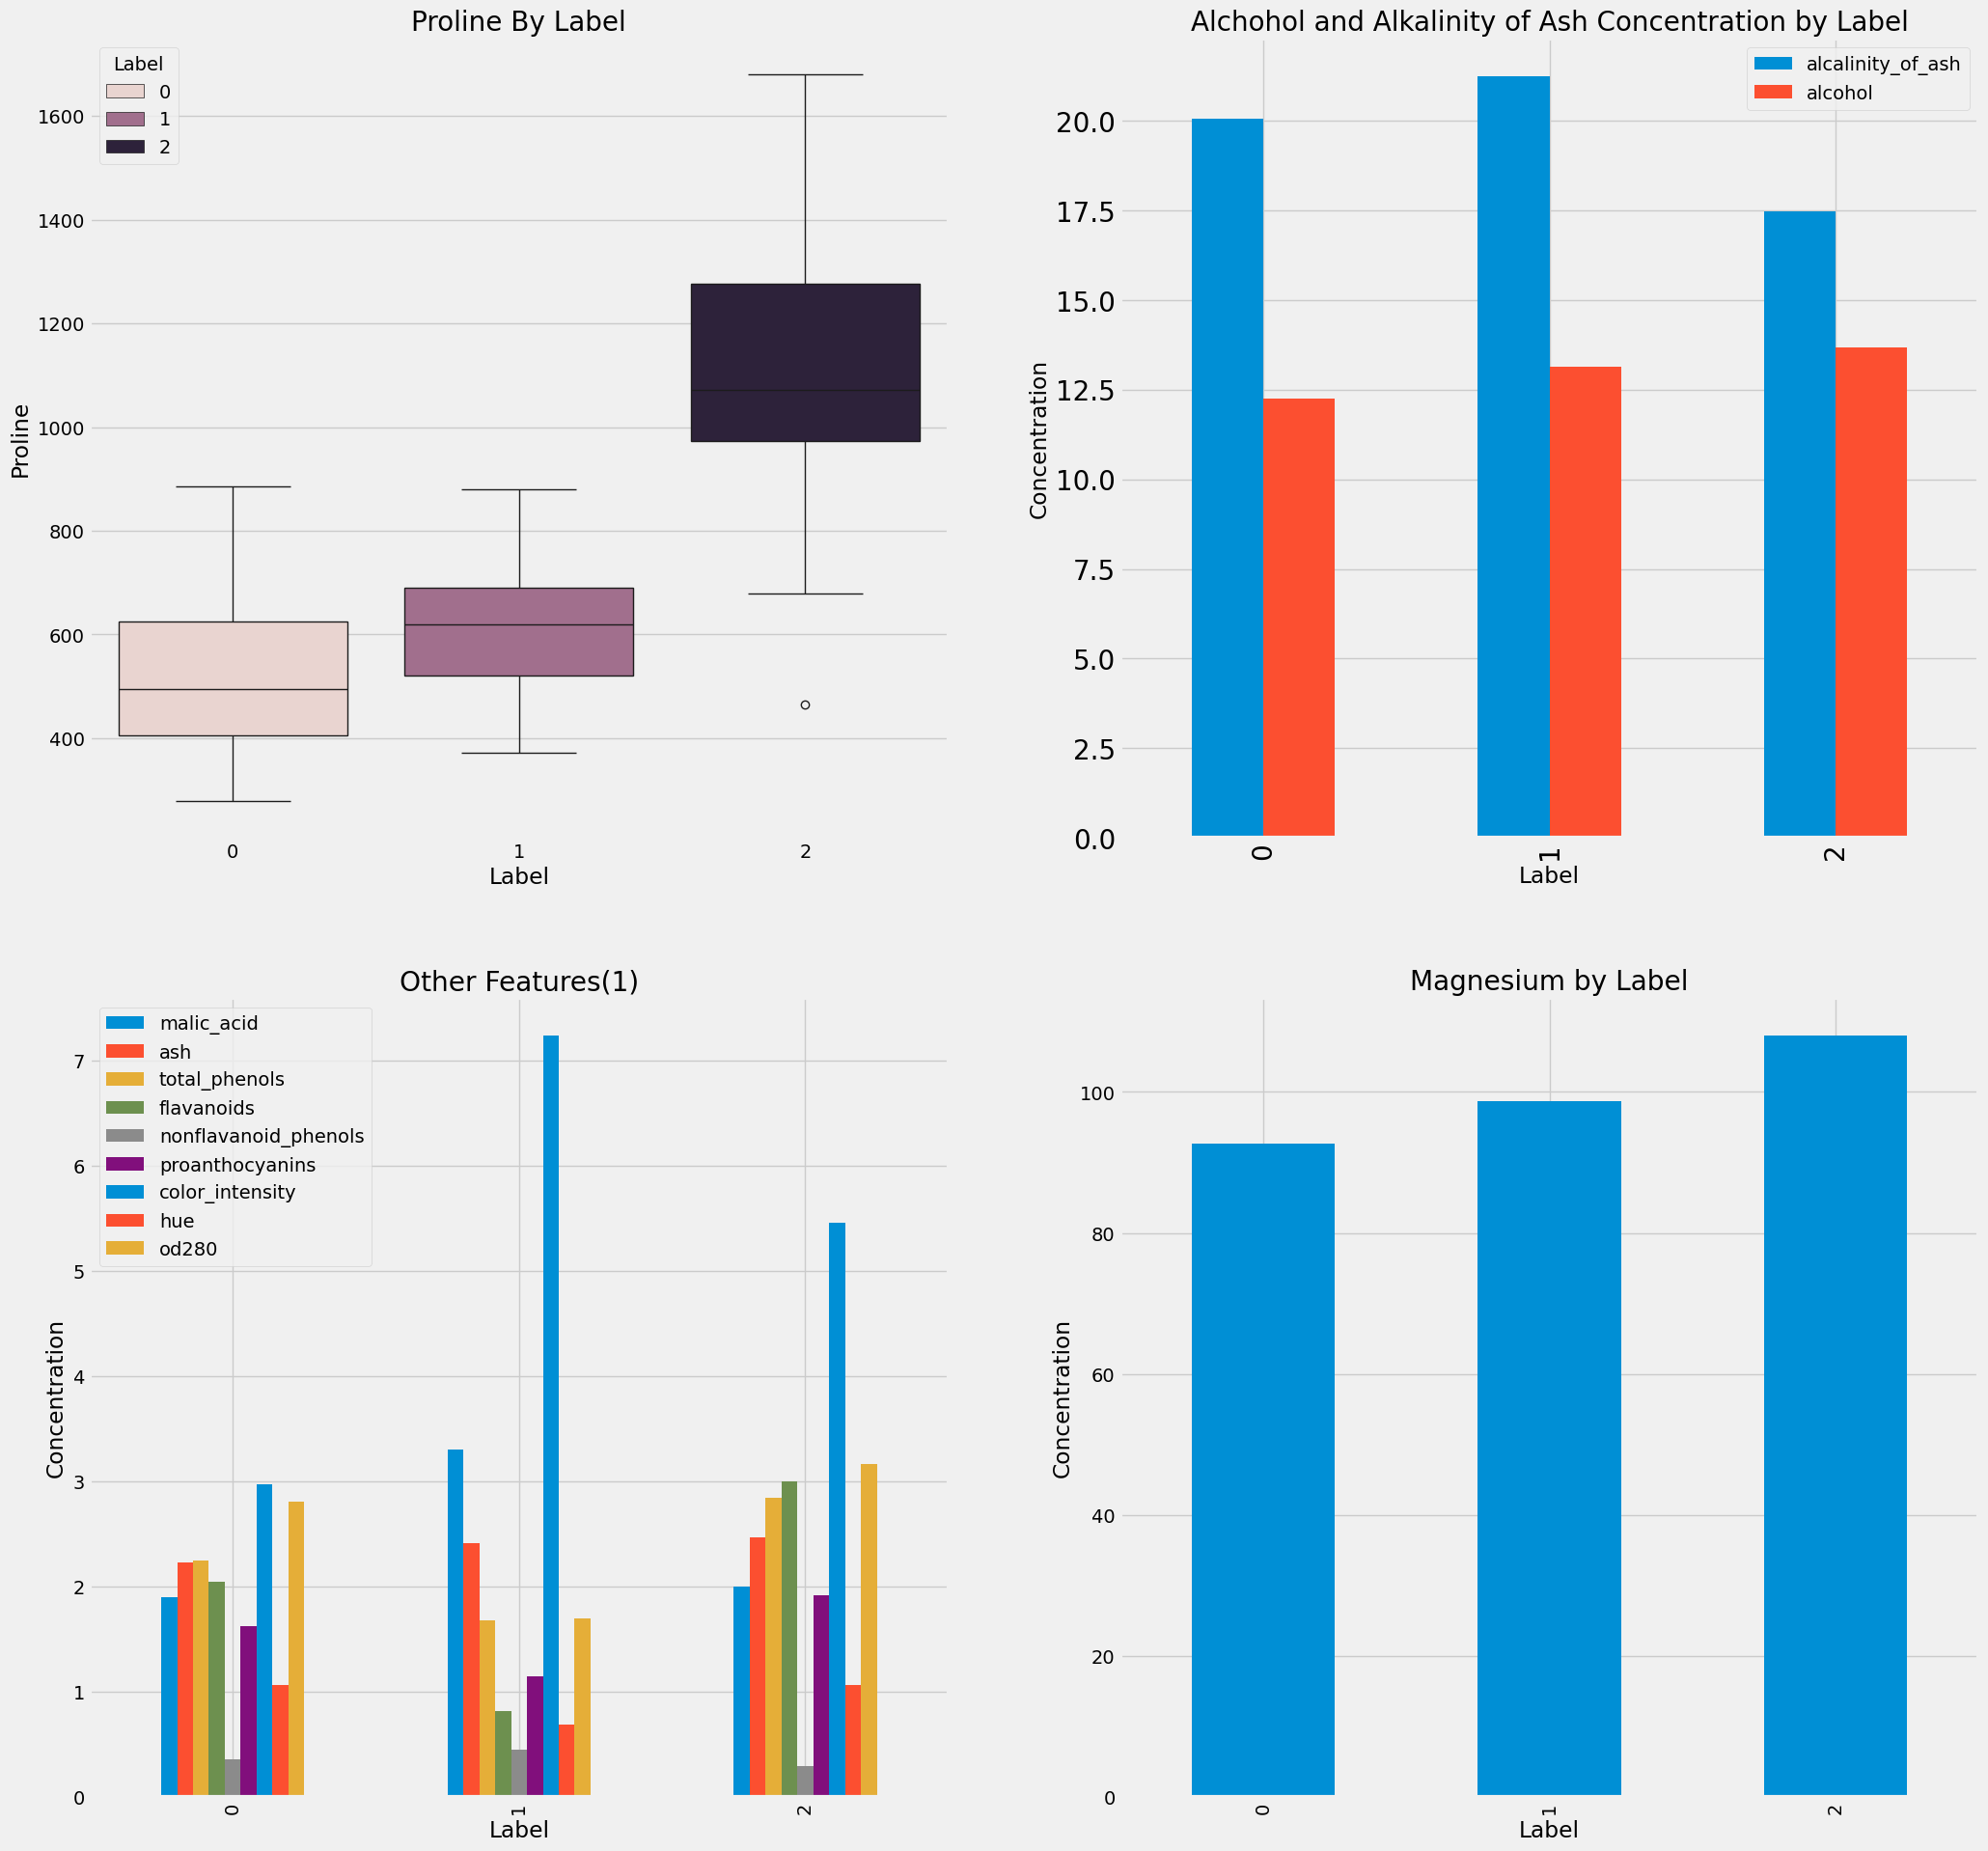

In [19]:
# It will be helpful to visualize components of the 3 clusters, and the many feautures to see how they all differ
# -- Certain features have different scales so we will split up the df
proline = df[["proline", "Label"]]
ash_alc = grouped_df[["alcalinity_of_ash", "alcohol"]]

# Create two sets for features with smaller values
smaller_features = [col for col in grouped_df.columns if col not in ["alcalinity_of_ash", "magnesium", "proline", "alcohol"]]

# Create Figure
fig, ax = plt.subplots(2, 2, figsize=(22.5, 22.5))

# -- Figure 1: Proline
sns.boxplot(proline, x='Label', y='proline', ax=ax[0,0], hue='Label')
ax[0,0].set_ylabel("Proline"); ax[0,0].set_title("Proline By Label", fontsize=20)


# -- Figure 2: Magnesium and Ash
ash_alc.plot(kind='bar', ax=ax[0,1], fontsize=20)
ax[0,1].set_ylabel("Concentration"); ax[0,1].set_title("Alchohol and Alkalinity of Ash Concentration by Label", fontsize=20)

# -- Figure 3: ['alcohol', 'malic_acid', 'ash', 'total_phenols', 'flavanoids']
small_features1 = grouped_df[smaller_features]

# Color
cmap = plt.get_cmap('tab10')  # Alternatives: 'Set2', 'Dark2', 'Accent', etc.

# Generate colors for each bar
num_bars = small_features1.shape[1]
colors = [cmap(i % cmap.N) for i in range(num_bars)]

small_features1.plot(kind='bar', ax=ax[1,0], title = "Other Features(1)", color = c)
ax[1, 0].set_xlabel("Label"); ax[1, 0].set_ylabel("Concentration")

# -- Figure 4: 
magnesium = grouped_df[["magnesium"]]
magnesium.plot(ax = ax[1,1], kind = 'bar', title = "Magnesium by Label", legend=False)
ax[1, 1].set_xlabel("Label"); ax[1, 1].set_ylabel("Concentration")

plt.show()